In [1]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys. Place your keys here.
from config import api_keyTwitter
from config import api_secretTwitter
from config import access_tokenTwitter
from config import access_tokensecretTwitter

# Setup Tweepy API Authentication

auth = tweepy.OAuthHandler(api_keyTwitter, api_secretTwitter)
auth.set_access_token(access_tokenTwitter, access_tokensecretTwitter)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [ ]:
#Your final Jupyter notebook must:


#Pull last 100 tweets from each outlet.
#Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
#Pull into a DataFrame the tweet's source acount, its text, its date,
    #and its compound, positive, neutral, and negative sentiment scores.
#Export the data in the DataFrame into a CSV file.
#Save PNG images for each plot.

In [32]:
##==============================================================================================================
#The functions of this cell are:
    #1. This cell pulls the lass 100 tweets from each outlet
    #2. Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
##==============================================================================================================


target_user = ("@CNNbrk","@BBC","@CBS", "@FOXTV", "@nytimes"  )# Target Account = BBC, CBS, CNN, Fox, and New York times

counter = 1                                             # Counter
sentiments = []                                         # Variables for holding sentiments


for network in target_user: 
    
   # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
       
   
    for x in range(10):                                     # Loop through 5 pages of tweets (total 100 tweets)
       
        public_tweets = api.user_timeline(target_user)     # Get all tweets from home feed
 
        for tweet in public_tweets:                        # Loop through all tweets
   
            # Print Tweets
            # print("Tweet %s: %s" % (counter, tweet["text"]))

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            
             # Add each value to the appropriate array
           # compound_list.append(compound)
            #positive_list.append(pos)
            #negative_list.append(neg)
            #neutral_list.append(neu)
            

            # Add sentiments for each tweet into an array
            sentiments.append({"Network": network,
                               "Tweeter ID": tweet["user"],
                               "Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter,                             
                               "Tweet": tweet["text"].encode("UTF-8")})

           
            counter = counter + 1                           # Add to counter 
 

In [33]:
##==============================================================================================================
#The functions of this cell are:
    #1. #Pull into a DataFrame the tweet's source account, its text, its date,
         #and its compound, positive, neutral, and negative sentiment scores.
    #2. Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
##==============================================================================================================
sentiments_pd = pd.DataFrame.from_dict(sentiments)          # Convert sentiments to DataFrame
#sentiments_pd.head()
sentiments_pd

,Compound,Date,Negative,Network,Neutral,Positive,Tweet,Tweeter ID,Tweets Ago
0,0.8807,Sat Mar 17 20:39:19 +0000 2018,0.595,@CNNbrk,0.000,0.405,"b""Now and then it's good to pause in our pursu...","{'id': 566958672, 'id_str': '566958672', 'name...",1
1,0.5574,Sat Mar 17 20:38:19 +0000 2018,0.783,@CNNbrk,0.000,0.217,b'The happiness of your life depends upon the ...,"{'id': 566958672, 'id_str': '566958672', 'name...",2
2,0.6705,Sat Mar 17 20:37:18 +0000 2018,0.476,@CNNbrk,0.000,0.524,b'Happiness is a warm puppy. - Charles M. Schulz',"{'id': 566958672, 'id_str': '566958672', 'name...",3
3,0.7824,Sat Mar 17 20:36:18 +0000 2018,0.623,@CNNbrk,0.000,0.377,"b'Count your age by friends, not years. Count ...","{'id': 566958672, 'id_str': '566958672', 'name...",4
4,0.7430,Sat Mar 17 20:35:18 +0000 2018,0.717,@CNNbrk,0.000,0.283,"b'Happiness is when what you think, what you s...","{'id': 566958672, 'id_str': '566958672', 'name...",5
5,0.5719,Sat Mar 17 20:34:17 +0000 2018,0.802,@CNNbrk,0.000,0.198,b'Folks are usually about as happy as they mak...,"{'id': 566958672, 'id_str': '566958672', 'name...",6
6,-0.3400,Sat Mar 17 20:33:17 +0000 2018,0.556,@CNNbrk,0.278,0.167,b'For every minute you are angry you lose sixt...,"{'id': 566958672, 'id_str': '566958672', 'name...",7
7,0.0000,Sat Mar 17 20:22:05 +0000 2018,1.000,@CNNbrk,0.000,0.000,b'Still in Python!!!:) https://t.co/B0hgbbu0bX',"{'id': 566958672, 'id_str': '566958672', 'name...",8
8,0.4588,Sat Mar 17 20:20:12 +0000 2018,0.571,@CNNbrk,0.000,0.429,b'Finally a use for twitter. :)',"{'id': 566958672, 'id_str': '566958672', 'name...",9
9,0.0000,Sat Mar 17 20:16:07 +0000 2018,1.000,@CNNbrk,0.000,0.000,"b""hello there, I'm tweeting with Python""","{'id': 566958672, 'id_str': '566958672', 'name...",10


In [34]:
##==============================================================================================================
#Export the data in the DataFrame into a CSV file.
##==============================================================================================================

sentiments_pd.to_csv('Output/Newbolt_SentimentsFile.csv')   #Prints to an output csv

In [12]:
# These Dataframes will be used to make the unique scatter plots... Can this be put in a for loop as well?
#target_user = ("@CNNbrk","@BBC","@CBS", "@FOXTV", "@nytimes" ) 
CNN_df = sentiments_pd.loc[sentiments_pd["Network"] == "@CNNbrk"]
BBC_df = sentiments_pd.loc[sentiments_pd["Network"] == "@BBC"]
CBS_df = sentiments_pd.loc[sentiments_pd["Network"] == "@CBS"]
FOX_df = sentiments_pd.loc[sentiments_pd["Network"] == "@FOXTVk"]
nyTimes_df = sentiments_pd.loc[sentiments_pd["Network"] == "@nytimes"]
nyTimes_df
#CNNTWEET_count= CNN_df(["Network"]).count(["@CNNbrk"])
#CNNTWEET_count = CNN_df.groupby(["city"]).count()["ride_id"]
#urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
#CNNTWEET_count


,Compound,Negative,Network,Neutral,Positive,Tweets Ago
220,0.8807,0.595,@nytimes,0.000,0.405,221
221,0.5574,0.783,@nytimes,0.000,0.217,222
222,0.6705,0.476,@nytimes,0.000,0.524,223
223,0.7824,0.623,@nytimes,0.000,0.377,224
224,0.7430,0.717,@nytimes,0.000,0.283,225
225,0.5719,0.802,@nytimes,0.000,0.198,226
226,-0.3400,0.556,@nytimes,0.278,0.167,227
227,0.0000,1.000,@nytimes,0.000,0.000,228
228,0.4588,0.571,@nytimes,0.000,0.429,229
229,0.0000,1.000,@nytimes,0.000,0.000,230


In [ ]:
# Build the scatter plots for each city types
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Rural")

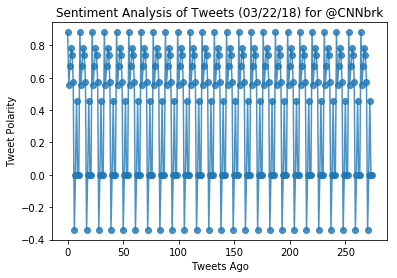

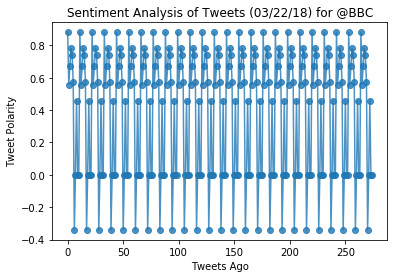

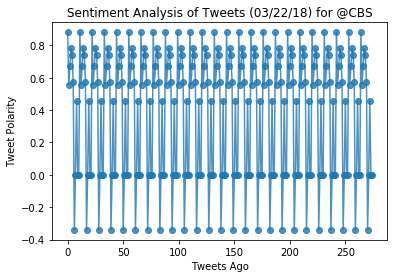

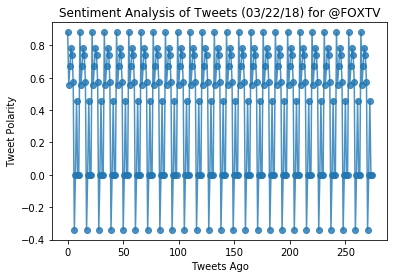

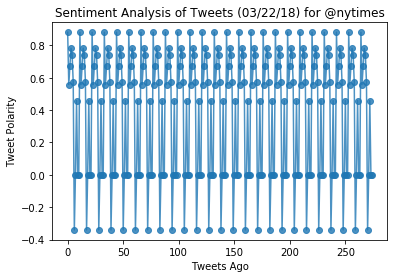

In [8]:
#I'm trying to create a for loop to run through all of my networks and create a scatter plot for each.

for network in target_user: 
    # Create plot
    plt.plot(np.arange(len(sentiments_pd["Network"]==network)),
             sentiments_pd["Compound"], marker="o",
             alpha=0.8)

    # # Incorporate the other graph properties
    plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), network))
    plt.ylabel("Tweet Polarity")
    plt.xlabel("Tweets Ago")
    plt.show()